<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers

In [132]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [133]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [134]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [135]:
model = tf.keras.Sequential()
drop_out = 0
lern_rat = 0.0001
model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(lern_rat)))
model.add(layers.Dropout(drop_out))
model.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(lern_rat)))
model.add(layers.Dropout(drop_out))

# model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(lern_rat)))
# model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(lern_rat)))
# model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(lern_rat)))
# model.add(layers.Dropout(drop_out))

# model.add(layers.Dense(216, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dense(512, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# # model.add(layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dropout(0.5))
# # model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(10, activation='softmax'))
# model.add(layers.Softmax())

In [136]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

In [137]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=120,
                    batch_size=512,
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/120
98/98 [==============================] - 8s 81ms/step - loss: 1.9066 - sparse_categorical_accuracy: 0.4139 - val_loss: 1.3398 - val_sparse_categorical_accuracy: 0.6762
Epoch 2/120
98/98 [==============================] - 7s 73ms/step - loss: 1.3350 - sparse_categorical_accuracy: 0.6140 - val_loss: 1.0555 - val_sparse_categorical_accuracy: 0.7032
Epoch 3/120
98/98 [==============================] - 8s 84ms/step - loss: 1.1372 - sparse_categorical_accuracy: 0.6669 - val_loss: 0.9457 - val_sparse_categorical_accuracy: 0.7304
Epoch 4/120
98/98 [==============================] - 7s 69ms/step - loss: 1.0403 - sparse_categorical_accuracy: 0.6990 - val_loss: 0.8849 - val_sparse_categorical_accuracy: 0.7484
Epoch 5/120
98/98 [==============================] - 8s 84ms/step - loss: 0.9805 - sparse_categorical_accuracy: 0.7169 - val_loss: 0.8449 - val_sparse_categorical_accuracy: 0.7628
Epoch 6/120
98/98 [==============================] - 7s 67ms/step - loss: 0.9357 - sparse_categorica

In [138]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


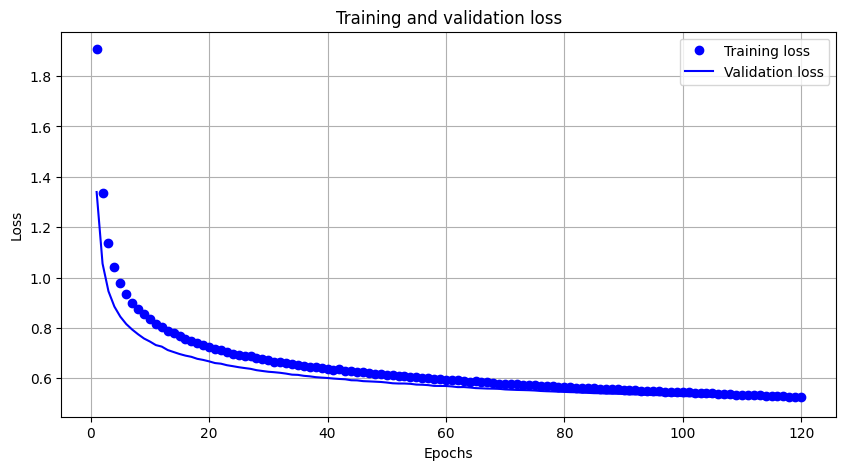

<Figure size 640x480 with 0 Axes>

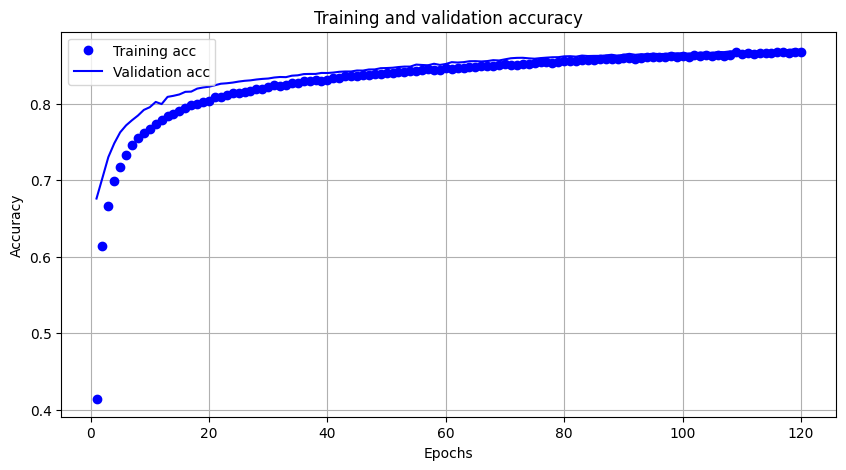

In [139]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [140]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [141]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [142]:
predictions[0]

array([0.08694863, 0.08694585, 0.08694728, 0.08694892, 0.08694817,
       0.08942833, 0.08694919, 0.09774844, 0.08704544, 0.20408976],
      dtype=float32)

In [143]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 784)               615440    
                                                                 
 dropout_23 (Dropout)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 784)               615440    
                                                                 
 dropout_24 (Dropout)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                7850      
                                                                 
Total params: 1238730 (4.73 MB)
Trainable params: 123